In [46]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import os
from matplotlib import pyplot as plt
import numpy as np

In [47]:

train_file_path = os.path.join('data','KDDTrain+.csv')

In [48]:
# Load the training data
df = pd.read_csv(train_file_path)
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,150,25,0.17,0.03,0.17,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,13,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,123,...,255,26,0.10,0.05,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,5,...,30,255,1.00,0.00,0.03,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,30,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [49]:
df.shape

(125419, 28)

In [50]:
categorical_features = ["protocol_type", "service", "flag"]
numerical_features = df.columns.difference(categorical_features + ["attack"])

In [51]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(drop="first", sparse_output=False),
            categorical_features,
        ),
        ("num", StandardScaler(), numerical_features),
    ]
)


In [52]:
# Separate features and target
X = df.drop(columns=["attack"])
y = df["attack"]

In [53]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [54]:
# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Print the shape of the preprocessed data
print(f"Shape after preprocessing: {X_preprocessed.shape}")

Shape after preprocessing: (125419, 105)


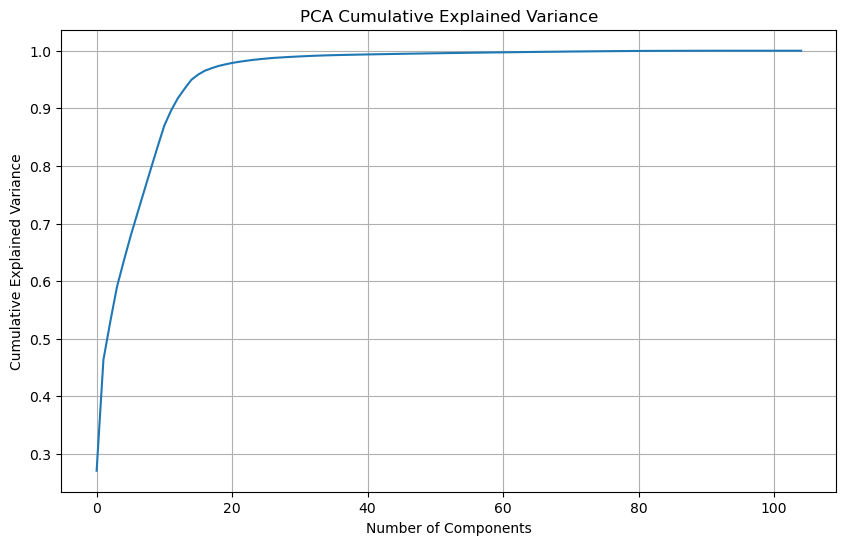

In [55]:
# Fit PCA to get explained variance ratios
pca = PCA().fit(X_preprocessed)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)


In [60]:
# Apply PCA
pca = PCA(n_components=0.97, random_state=42)
X_pca = pca.fit_transform(X_preprocessed)

# Print the shape after applying PCA
print(f"Shape after applying PCA: {X_pca.shape}")

Shape after applying PCA: (125419, 19)
